In [183]:
#import necessary libraries
import requests
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re



In [327]:
#function definitions
def make_points(json_str):
    df = pd.DataFrame(
    {'City': [],
     'Country': [],
     'Longitude': [],
     'Latitude': []})

    i = 0

    for p in json_str['resultsPage']['results']['event']:
        #     print(p['popularity'])
        lng = p['location']['lng']
        lat = p['location']['lat']
        city = p['location']['city']
        
        df.loc[i] = [city.split(',')[0]] + [city.split(',')[1]] + [lat] +[lng]

        i+=1
    #convert to gdf to plot
    gdf = gpd.GeoDataFrame(
        df, geometry=[Point(x, y) for y, x in zip(df['Longitude'], df['Latitude'])])

    gdf2 = gdf
    gdf2 = gdf2.drop(list(range(1, len(gdf))))
    gdf3 = gdf
    gdf3 = gdf3.drop(list(range(0, len(gdf)-1)))

    
    return(gdf, gdf2, gdf3)

def run_plot(req):
    gdfs = make_points(req.json())

    points_gdf = gdfs[0]
    print(points_gdf)
    start_gdf = gdfs[1]
    stop_gdf = gdfs[2]

    #current us basemap
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # fig, ax = plt.subplots(figsize=(15,15))
    ax = world[world.continent == 'North America'].plot(
#     ax = world.plot(
        color='white', edgecolor='black')

    ax.set_xlim(-130, -65)
    ax.set_ylim(24, 50)

    # We can now plot our ``GeoDataFrame``.
    points_gdf.plot(ax=ax, color='blue')

    start_gdf.plot(ax=ax, color='green')
    stop_gdf.plot(ax=ax, color='red')

    points = []

    linedf = pd.DataFrame(
        {'Line': []})

    for i in range(len(points_gdf)):
        points.append(points_gdf.iloc[i].loc["geometry"])

    line = LineString(points)

    def plot_line(ax, ob):
        x, y = ob.xy
        ax.plot(x, y, color='grey', alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)

    plot_line(ax, line)

    plt.tight_layout()

    plt.show()
    
def get_artist_id(artist_name):
    json_str = requests.get("https://api.songkick.com/api/3.0/search/artists.json?apikey=" + api_key + "&query=" + artist_name).json()
    return str(json_str['resultsPage']['results']['artist'][0]['id'])

def req_input():
    print("Welcome")
    while (True):
        past = True
        
        cmd = input("Past events (0), upcoming events (1): ")
        
        if (cmd == 1):
            past = False
            
        cmd = input("Please type the parameters: [artist_name, min_date, max_date.] Separate with commas."
                   + "\nIf no input, just add a comma and skip.\n")
        
        if (cmd == 'quit'):
            return
        
        cs = cmd.split(',')
        an = get_artist_id(cs[0].replace(' ', '+')) if not (cs[0]+' ').isspace() else print('need artist!')
        if (cs[0]+' ').isspace():
            continue
#         loc = "&location=" + cs[1].replace(' ', '+') if not cs[1].isspace() else ''
        mind = "&min_date=" + cs[1].replace(' ', '') if (re.search("\d{4}-\d{2}-\d{2}", cs[1])) else ''
        maxd = "&max_date=" + cs[2].replace(' ', '') if (re.search("\d{4}-\d{2}-\d{2}", cs[2])) else ''
        
        if (past == True):
            r = requests.get("https://api.songkick.com/api/3.0/artists/"+ an +"/gigography.json?apikey="+ api_key 
                              + mind + maxd)
#             print("https://api.songkick.com/api/3.0/artists/"+ an +"/gigography.json?apikey="+ api_key 
#                               + mind + maxd)
            run_plot(r)
        else:
            r = requests.get("https://api.songkick.com/api/3.0/events.json?apikey="+ api_key 
                + an + loc + mind + maxd)
            print(r.json())
            run_plot(r)
              

    
# req = requests.get("https://api.songkick.com/api/3.0/events.json?apikey=fCnCRQ1S6LDAS7zQ&artist_name=young+thug&min_date=2019-10-01&max_date=2019-11-01")

# req = requests.get("https://api.songkick.com/api/3.0/events.json?apikey=fCnCRQ1S6LDAS7zQ&artist_name=travis+scott&min_date=2018-01-01&max_date=2022-11-01")

# print(get_artist_id('travis+scott'))

# print("https://api.songkick.com/api/3.0/artists/"+ get_artist_id('travis+scott') + "/gigography.json?apikey=fCnCRQ1S6LDAS7zQ")

# print(req.text)


Welcome
Past events (0), upcoming events (1): 0
Please type the parameters: [artist_name, min_date, max_date.] Separate with commas.
If no input, just add a comma and skip.
travis scott, 2018-10-31, 2018-12-01
                City Country  Longitude   Latitude  \
0   Los Angeles (LA)      CA   34.11805 -118.29383   
1     West Hollywood      CA   34.09106 -118.36358   
2          Baltimore      MD   39.28850  -76.61869   
3            Raleigh      NC   35.80348  -78.72193   
4              Miami      FL   25.78123  -80.18781   
5              Tampa      FL   27.94259  -82.45196   
6            Atlanta      GA   33.75723  -84.39634   
7             Dallas      TX   32.79044  -96.81016   
8            Houston      TX   29.68472  -95.40900   
9         Louisville      KY   38.25664  -85.75392   
10           Toronto      ON   43.64352  -79.37908   
11            Newark      NJ   40.73375  -74.17027   
12        Pittsburgh      PA   40.43959  -79.98894   
13        Pittsburgh      PA   40.

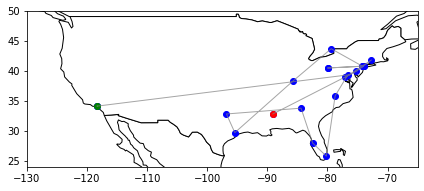

In [ ]:
req_input()

#travis scott, 2018-10-31, 2018-12-01

In [324]:
re.search("\d{4}-\d{2}-\d{2}", "2018-12-01")

<re.Match object; span=(0, 10), match='2018-12-01'>

In [256]:
points = []
# points.__array_interface__ = 

linedf = pd.DataFrame(
    {'Line': []})

for i in range(len(gdf)):
    points.append(gdf.iloc[i].loc["geometry"])
#     lon1 = gdf.iloc[i].loc["Longitude"]
#     lon2 = gdf.iloc[i+1].loc["Longitude"]
#     lat1 = gdf.iloc[i].loc["Latitude"]
#     lat2 = gdf.iloc[i+1].loc["Latitude"]


# linegdf = gpd.GeoDataFrame(
#         df, geometry=[Point(x, y) for y, x in zip(df['Longitude'], df['Latitude'])])


line = LineString(points)
# linedf.iloc[0] = 

# linegdf = gpd.GeoDataFrame(line, geometry=[Point(x, y) for y, x in zip(df['Longitude'], df['Latitude'])])

# line.plot(ax=ax, color='blue')

# line.plot_coords()

def plot_line(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    
plot_line(ax, line)

plt.show()


